# Notebook to explore loading data, understanding features, and using APIs to implement different training algorithms. 
# Data from Kaggle Walmart store sales competition

In [1]:
# Import modules for data manipulation
import numpy as np
import pandas as pd

# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Import module to separate training and validation sets
from sklearn.model_selection import train_test_split

# Import module to query pandas data frames in SQL format
from pandasql import sqldf
pysqldf = lambda q: sqldf(q,globals())

# Import modules for machine learning
import torch
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

# Read data from csv files into dataframes using pandas

In [2]:
# Load csv files for features, stores, train and test, and a sample submission
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sampleSubmission = pd.read_csv("sampleSubmission.csv")

# Visualize data from dataframes

In [3]:
features.head(8)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False


In [4]:
features.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [6]:
stores.head(8)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078


In [7]:
stores.dtypes

Store     int64
Type     object
Size      int64
dtype: object

In [8]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [9]:
train.head(8)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False


In [10]:
train.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [12]:
sampleSubmission.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [13]:
sampleSubmission.dtypes

Id              object
Weekly_Sales     int64
dtype: object

In [14]:
sampleSubmission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Id            115064 non-null  object
 1   Weekly_Sales  115064 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


### From the data it can be seen that
**Features:**
 - Date field has object data type, it should be changes to datatime
 - Markdown1 ... Markdown5 fields are numeric, but have missing entries, validate how many missing entries are there to evaluate if the missing data should be filled, is relevant, or should be dropped for model training
 - Check data range in training + test sets to present results

**Stores:**
 - Data frame has store number, type (A, B, C) and size, suggests features + store data frames can be merged for model training

**Training data set:**
 - Includes the end date of the week, store and department, weekly sales and if the week includes a holiday.
 - With features + stores + training / test sets create and evaluate models

In [15]:
# Merge features and stores data frames with Store key
feat_store = features.merge(stores, how="inner", on="Store")

In [16]:
feat_store.head(8)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False,A,151315
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False,A,151315
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False,A,151315


In [17]:
# Change Date from object type to datetime
feat_store.Date = pd.to_datetime(feat_store.Date)

In [18]:
feat_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
 12  Type          8190 non-null   object        
 13  Size          8190 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 903.8+ KB


In [19]:
# See how many entries are missing for each column
feat_store.isnull().sum(axis = 0)

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
Type               0
Size               0
dtype: int64

In [20]:
feat_store.isnull().sum(axis = 0)/len(feat_store)

Store           0.000000
Date            0.000000
Temperature     0.000000
Fuel_Price      0.000000
MarkDown1       0.507692
MarkDown2       0.643346
MarkDown3       0.558852
MarkDown4       0.577045
MarkDown5       0.505495
CPI             0.071429
Unemployment    0.071429
IsHoliday       0.000000
Type            0.000000
Size            0.000000
dtype: float64

Given that Markdown1...Markdown5 have more than half the entries missing it is important to understand what these fields represent, and if there is any correlation with sales to evaluate their use in a model. Identify if 7% missing data in CPI and unemployment affects further analysis.

Create updated data frames for training and test sets, updating Data type

In [21]:
# Update date data types
train.Date = pd.to_datetime(train.Date)
test.Date = pd.to_datetime(test.Date)

# Merge train and test with frame_store data frame
train_feat = train.merge(feat_store, how="inner", on = ["Store", "Date", "IsHoliday"])
test_feat = test.merge(feat_store, how="inner", on = ["Store", "Date", "IsHoliday"])

In [22]:
train_feat.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [23]:
test_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         115064 non-null  int64         
 1   Dept          115064 non-null  int64         
 2   Date          115064 non-null  datetime64[ns]
 3   IsHoliday     115064 non-null  bool          
 4   Temperature   115064 non-null  float64       
 5   Fuel_Price    115064 non-null  float64       
 6   MarkDown1     114915 non-null  float64       
 7   MarkDown2     86437 non-null   float64       
 8   MarkDown3     105235 non-null  float64       
 9   MarkDown4     102176 non-null  float64       
 10  MarkDown5     115064 non-null  float64       
 11  CPI           76902 non-null   float64       
 12  Unemployment  76902 non-null   float64       
 13  Type          115064 non-null  object        
 14  Size          115064 non-null  int64         
dtypes: bool(1), datet

In [24]:
# Clean memory of data frames
del train, test, feat_store, features, stores

### Visualize Data

In [25]:
# After plotting several warnings come up from pyplot, set the notebook to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [26]:
weekly_sales = train_feat.groupby("Date").mean()

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

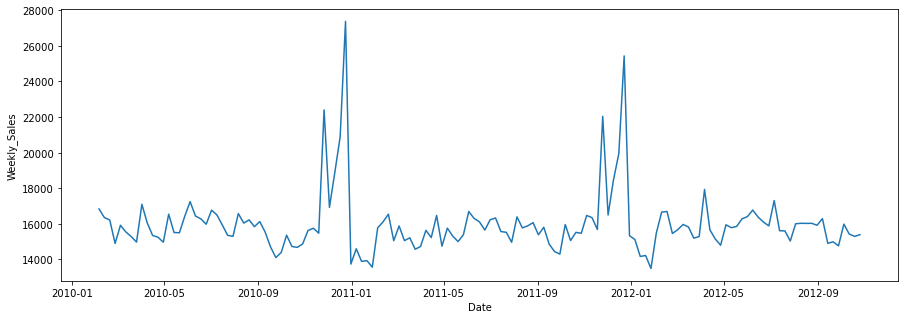

In [27]:
plt.figure(figsize=(15,5))
sns.lineplot(weekly_sales.reset_index()["Date"],weekly_sales.reset_index()["Weekly_Sales"])

Since there seems to be seasonal information, this graph indicates it would be a good idea to break down the date column into year and week of the year

In [28]:
# Add week and year info to train and test data frames
train_feat["Week"]=train_feat["Date"].dt.isocalendar().week
train_feat["Year"]=train_feat["Date"].dt.isocalendar().year

test_feat["Week"] =test_feat["Date"].dt.isocalendar().week
test_feat["Year"] =test_feat["Date"].dt.isocalendar().year

Replicate sales graph but mean over stores year over year

In [29]:
train_feat["Year"].unique()

<IntegerArray>
[2010, 2011, 2012]
Length: 3, dtype: UInt32

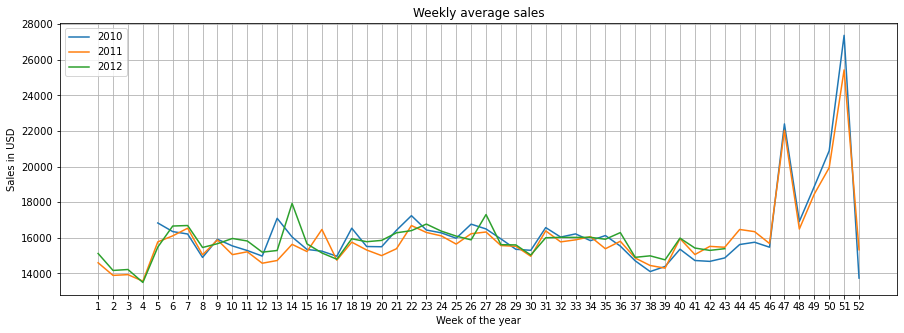

In [30]:
weekly_sales_2010 = train_feat[train_feat.Year == 2010].groupby("Week").mean()
weekly_sales_2011 = train_feat[train_feat.Year == 2011].groupby("Week").mean()
weekly_sales_2012 = train_feat[train_feat.Year == 2012].groupby("Week").mean()

# Create figure
plt.figure(figsize=(15,5))
sns.lineplot(weekly_sales_2010.reset_index()["Week"],weekly_sales_2010.reset_index()["Weekly_Sales"])
sns.lineplot(weekly_sales_2011.reset_index()["Week"],weekly_sales_2011.reset_index()["Weekly_Sales"])
sns.lineplot(weekly_sales_2012.reset_index()["Week"],weekly_sales_2012.reset_index()["Weekly_Sales"])
# Add formatting
plt.grid()
plt.xticks(np.arange(1,53,1))
plt.title("Weekly average sales")
plt.ylabel("Sales in USD")
plt.xlabel("Week of the year")
plt.legend(["2010","2011","2012"])

From the year over year plot it can be seen that they tend to match overall, except on week 13-16, check to see if a holiday around this time changes week over years

In [31]:
train_feat.loc[(train_feat.Year == 2010) & (train_feat.IsHoliday), "Week"].unique()

<IntegerArray>
[6, 36, 47, 52]
Length: 4, dtype: UInt32

In [32]:
train_feat.loc[(train_feat.Year == 2011) & (train_feat.IsHoliday), "Week"].unique()

<IntegerArray>
[6, 36, 47, 52]
Length: 4, dtype: UInt32

In [33]:
train_feat.loc[(train_feat.Year == 2012) & (train_feat.IsHoliday), "Week"].unique()

<IntegerArray>
[6, 36]
Length: 2, dtype: UInt32

From this search it is clear that for the IsHoliday feature, there is no characterization for 2010 week 13, 2011 week 14 and 2012 week 16. Checking possible events, it seems that peek is realted to Easter holidays, which occur on April 4 2010, April 24 2011 and April 8 2012

In [34]:
train_feat[(train_feat.Year == 2010) & (train_feat.Week == 13)].head()
train_feat[(train_feat.Year == 2011) & (train_feat.Week == 16)].head()
train_feat[(train_feat.Year == 2012) & (train_feat.Week == 14)].head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Year
8102,1,1,2012-04-06,57592.12,False,70.43,3.891,10121.97,NaN,77.98,3750.59,4510.72,221.435611,7.143,A,151315,14,2012
8103,1,2,2012-04-06,51805.88,False,70.43,3.891,10121.97,NaN,77.98,3750.59,4510.72,221.435611,7.143,A,151315,14,2012
8104,1,3,2012-04-06,9335.24,False,70.43,3.891,10121.97,NaN,77.98,3750.59,4510.72,221.435611,7.143,A,151315,14,2012
8105,1,4,2012-04-06,42060.21,False,70.43,3.891,10121.97,NaN,77.98,3750.59,4510.72,221.435611,7.143,A,151315,14,2012
8106,1,5,2012-04-06,28386.81,False,70.43,3.891,10121.97,NaN,77.98,3750.59,4510.72,221.435611,7.143,A,151315,14,2012


Since Easter is not a flagged holiday include it for further analysis

In [35]:
train_feat.loc[(train_feat.Year == 2010) & (train_feat.Week == 13),"IsHoliday"] = True
train_feat.loc[(train_feat.Year == 2011) & (train_feat.Week == 16),"IsHoliday"] = True
train_feat.loc[(train_feat.Year == 2012) & (train_feat.Week == 14),"IsHoliday"] = True
test_feat.loc[(train_feat.Year == 2013) & (train_feat.Week == 13),"IsHoliday"] = True

Check how weekly sales change by stores, by store type, and by department

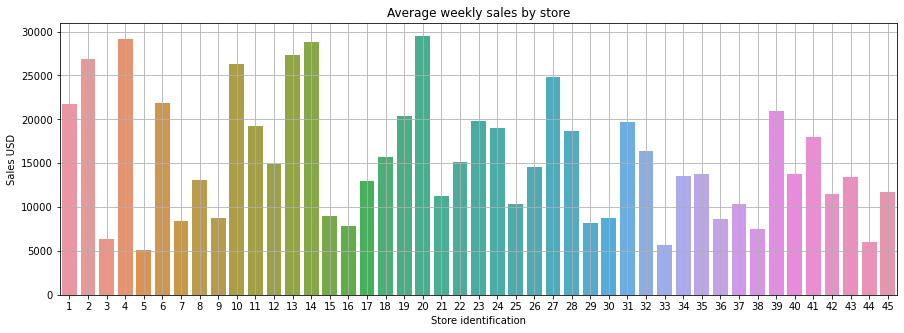

In [36]:
plt.figure(figsize=(15,5))
sns.barplot(train_feat.groupby("Store").mean().reset_index()["Store"],train_feat.groupby("Store").mean().reset_index()["Weekly_Sales"])
plt.title("Average weekly sales by store")
plt.ylabel("Sales USD")
plt.xlabel("Store identification")
plt.grid()

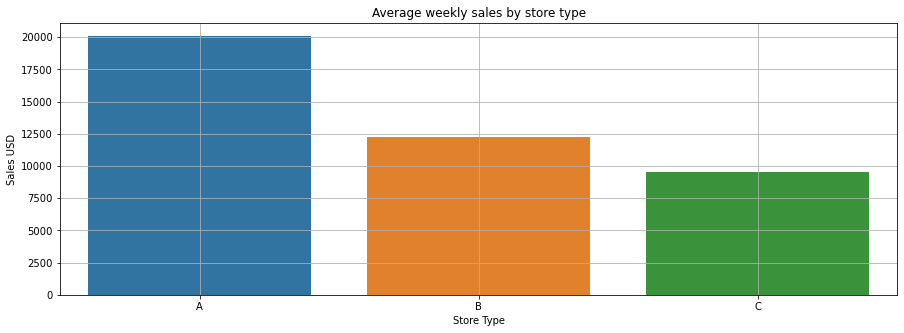

In [37]:
# Bar Plot for weekly sales by store type
plt.figure(figsize=(15,5))
sns.barplot(train_feat.groupby("Type").mean().reset_index()["Type"],train_feat.groupby("Type").mean().reset_index()["Weekly_Sales"])
plt.title("Average weekly sales by store type")
plt.ylabel("Sales USD")
plt.xlabel("Store Type")
plt.grid()

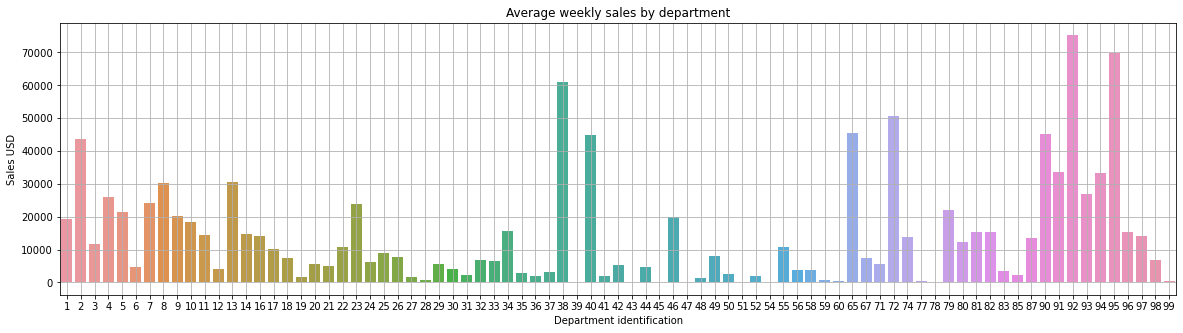

In [38]:
# Weekly sales averaged over departments
plt.figure(figsize=(20,5))
sns.barplot(train_feat.groupby("Dept").mean().reset_index()["Dept"],train_feat.groupby("Dept").mean().reset_index()["Weekly_Sales"])
plt.title("Average weekly sales by department")
plt.ylabel("Sales USD")
plt.xlabel("Department identification")
plt.grid()

From these plots it can bee seen that there is a clear difference between stores in sales as represented by the categorical feature **Type**, and since it seems to be an ordinal classification, for training the model it seems likely that changing the categorical to a numerical type can help. It also suggest that the mean of weekly sales is affected by store type, check difference between mean and median of weekly sales by stores.

The department figure shows that some departments have much larger sales than others, so if a particular store has one of these departments it can be an indicator for larger predicted sales

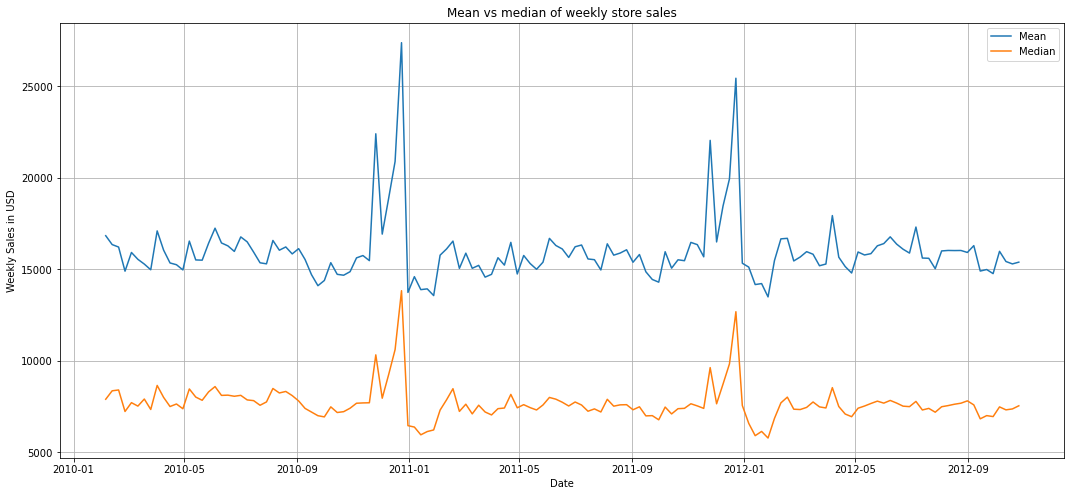

In [39]:
# Create figure for difference between mean and median for sales
plt.figure(figsize=(18,8))
sns.lineplot(train_feat.groupby("Date").mean().reset_index()["Date"],train_feat.groupby("Date").mean().reset_index()["Weekly_Sales"])
sns.lineplot(train_feat.groupby("Date").median().reset_index()["Date"],train_feat.groupby("Date").median().reset_index()["Weekly_Sales"])
plt.grid()
plt.title("Mean vs median of weekly store sales")
plt.ylabel("Weekly Sales in USD")
plt.xlabel("Date")
plt.legend(["Mean","Median"])

Since the mean and median are very different, it indicates that the categorical store type variable will be important for the model predictions. Given the ordinal feature, map A=3, B=2, C=1 in training and test sets

In [40]:
# Map categorical to numerical data in type feature
train_feat.Type = train_feat.Type.apply(lambda x: 3 if x == "A" else (2 if x == "B" else 1))
test_feat.Type = test_feat.Type.apply(lambda x: 3 if x == "A" else (2 if x == "B" else 1))

## Validate useful features
Since the features for training are still large, it would be important to only feed independent variables to the model to avoid over-fitting and speed-up testing of the models. This will be divided into two steps of analysis, first study correlation between the existing features, and second the necesity for imputation of missing data

### Correlation study

Use Pearson pair-wise correlation for a sample and identify is there are variables are highly correlated (meaning essentialy the same information) 

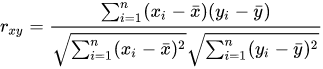

<AxesSubplot:>

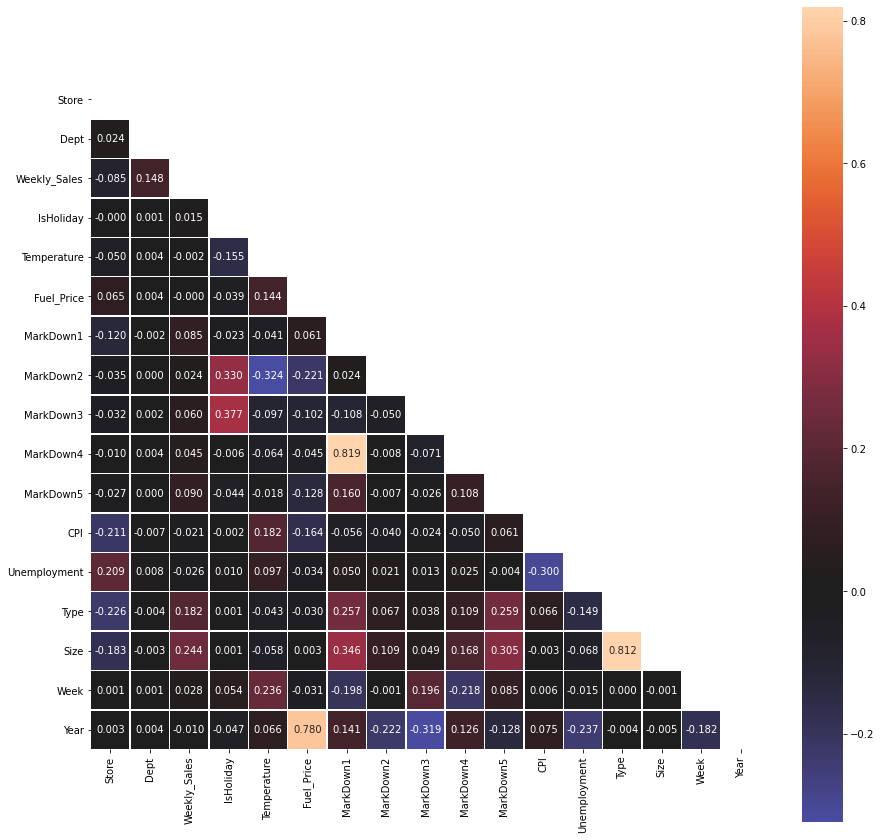

In [41]:
# Create correlation matrix for features
corr_mat = train_feat.corr()
# Given that correlation is symmetrical pairwise present only lower triangular part
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat,center=0,annot=True,linewidths=.5,fmt=".3f",square=True,mask=mask)

From the pair-wise correlation the highest correlation is between the following pairs, meaning that information is not lost by keeping only one of the pair:
 - Markdown1 and Markdown4
 - Year and Fuel Price
 - Type and Size
 
Looking for variables correlation to the Weekly_Sales, Size and Type (essentially the same information), have positive correlation. The rest of the variables don't have a strong correlation. 

For the Markdown features, the features with least observations, the strongest correlation is between:
 - Themselves
 - Type
 - Store
 - Week
 - Year

### Data Imputation

From the correlation analysis it seems the best approach would be to drop the Markdown features, as more than half the observation are missing, so looking for imputation of this missing data won't improve the model.

For the Year and Fuel variables we can drop the Fuel feature.

For the Size and Type variables we could in principle get rid of either, but since one was a categorical feature turned ordinal, we will keep both for creating the model. 

Get statistics for CPI and Unemployment features to decide what, if any, imputation strategy can be implemented. 

In [42]:
#Understand statistics for CPI feature
data = [{'Mean':train_feat.CPI.mean(), "Median":train_feat.CPI.median(), "Standard Deviation":train_feat.CPI.std(),
         "Max":train_feat.CPI.max(),"Min":train_feat.CPI.min(),"Mode":train_feat.CPI.mode().item()}]
pd.DataFrame(data)

,Mean,Median,Standard Deviation,Max,Min,Mode
0,171.201947,182.31878,39.159276,227.232807,126.064,129.855533


In [43]:
#Understand statistics for Unepmployment feature
data = [{'Mean':train_feat.Unemployment.mean(), "Median":train_feat.Unemployment.median(), "Standard Deviation":train_feat.Unemployment.std(),
         "Max":train_feat.Unemployment.max(),"Min":train_feat.Unemployment.min(),"Mode":train_feat.Unemployment.mode().item()}]
pd.DataFrame(data)

,Mean,Median,Standard Deviation,Max,Min,Mode
0,7.960289,7.866,1.863296,14.313,3.879,8.099


The CPI feature has a wide range, a large spread over the mean, it is a good idea to plot to better understand the statistic that can be used for imputation.

The Unemployment feature has a wide range, but limited spread, it suggests using the mean as a good statistic for imputation

<AxesSubplot:xlabel='CPI', ylabel='Count'>

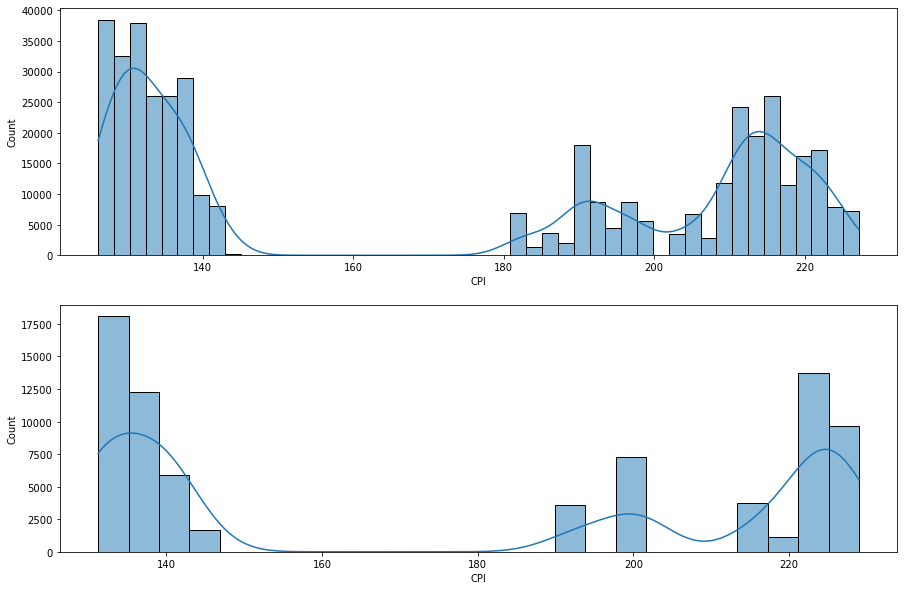

In [44]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.histplot(train_feat.CPI,kde=True)
plt.subplot(2,1,2)
sns.histplot(test_feat.CPI,kde=True)

Given that the data seems to have 3 peaks, neither the mean or median will be representative for data imputation. We will use the mode for data imputation of the CPI feature

In [45]:
# Drop the features that are redundant or unnecesarry
train_feat = train_feat.drop(columns=["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","Fuel_Price"])
test_feat = test_feat.drop(columns=["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","Fuel_Price"])

In [46]:
# Perform Data imputation on CPI
train_feat["CPI"] = train_feat.CPI.fillna(train_feat.CPI.mode().item())
test_feat["CPI"] = test_feat.CPI.fillna(train_feat.CPI.mode().item())

In [47]:
# Perform Data imputation on Unemployment
train_feat["Unemployment"] = train_feat.Unemployment.fillna(train_feat.Unemployment.mean())
test_feat["Unemployment"] = test_feat.Unemployment.fillna(train_feat.Unemployment.mean())

# Model Implementation

Since the expected value of the model is a real number, that is a regression, we will test out different algorithms to achieve a continuos value output
 - Linear regression model
 - Random forest regressor
 - Neural Network

## Comparing models

Since we wish to validate different models we must compare them against the known output with a loss function. In the proposed competition the loss is a weighted average of the absolute error, weighted by wether the particular date is a holiday or not. Specifically the weights are w_i=1 if it is not a holiday week, and w_i=5 if it is a holiday week. That underlying scheme tries to capture the fact that correctly estimating holiday week sales is important for Walmart. 

In [48]:
def WMAE(dataset, testing_data, predicted_data):
    # Create weights for each instance of the data
    weights = dataset.IsHoliday.apply(lambda x: 5 if x else 1)
    return np.sum(weights*abs(testing_data - predicted_data))/np.sum(weights)

## Linear Regression

In [49]:
X_train = train_feat[["Store","Dept","IsHoliday","CPI","Unemployment","Type","Size","Week","Year"]]
Y_train = train_feat["Weekly_Sales"]
X_test = test_feat[["Store","Dept","IsHoliday","CPI","Unemployment","Type","Size","Week","Year"]]
regr = linear_model.LinearRegression()
regr.fit(X_train,Y_train)
Y_pred = regr.predict(X_test)

In [50]:
# Create data frame for predicted values with X_test
Y_pred_df = pd.DataFrame({"Y_pred":Y_pred})
Y_pred_df_feat = pd.concat([Y_pred_df,X_test,test_feat["Date"]],axis=1)
# Create holding variable averaged over date to plot 
pred_time_series = Y_pred_df_feat.groupby("Date").mean().reset_index()

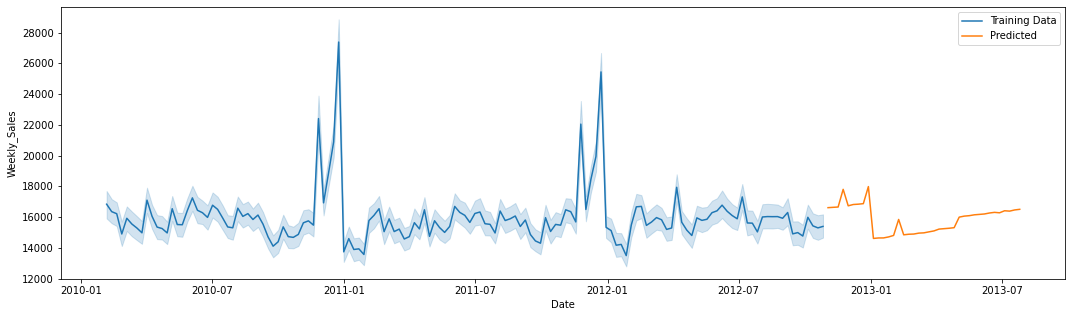

In [51]:
#Plot train data and test data prediction on a single plot
plt.figure(figsize=(18,5))
sns.lineplot(train_feat["Date"],train_feat["Weekly_Sales"])
sns.lineplot(pred_time_series["Date"],pred_time_series["Y_pred"])
plt.legend(["Training Data","Predicted"])

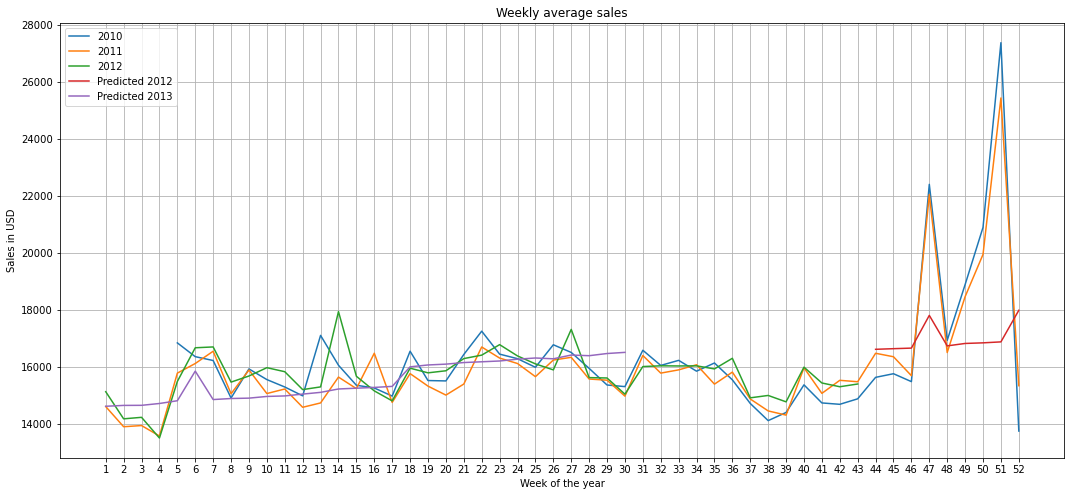

In [52]:
#Plot year over year weekly sales 

# Create figure
plt.figure(figsize=(18,8))
sns.lineplot(weekly_sales_2010.reset_index()["Week"],weekly_sales_2010.reset_index()["Weekly_Sales"])
sns.lineplot(weekly_sales_2011.reset_index()["Week"],weekly_sales_2011.reset_index()["Weekly_Sales"])
sns.lineplot(weekly_sales_2012.reset_index()["Week"],weekly_sales_2012.reset_index()["Weekly_Sales"])
sns.lineplot(pred_time_series[pred_time_series.Year==2012]["Week"],pred_time_series[pred_time_series.Year==2012]["Y_pred"])
sns.lineplot(pred_time_series[pred_time_series.Year==2013]["Week"],pred_time_series[pred_time_series.Year==2013]["Y_pred"])
# Add formatting
plt.grid()
plt.xticks(np.arange(1,53,1))
plt.title("Weekly average sales")
plt.ylabel("Sales in USD")
plt.xlabel("Week of the year")
plt.legend(["2010","2011","2012","Predicted 2012", "Predicted 2013"])

From the analysis it is confirmed that a linear approximation cannot assume the complexity of the data from the different features. This is because the linear approximation is linear in the features, but the analysis of the training data showed that there exists correlation between come features, that the Holiday flag can significantly increase expected weekly sales, and that there are seasonal effects. 

Additionally since the linear approximation minimizes the squared error, we could slightly improve the model by imposing the WMAE loss function

## Random Forest Regressor

The Random Forest Regressor trains a model by defining criteria to define output values based on the input values of features. For this example we will use Scikit Learn and do the hyper-parameter exploration for the criteria of number of estimators and maximum depth of the tree. We will use all features for training the model, but the number of features could also be a hyper-parameter for training further models.  

In [ ]:
#Create DataFrames for training and validation

In [53]:
# Test fitting data with simple parameters
RF = RandomForestRegressor(n_estimators=10, max_depth=5, max_features=4)
RF.fit(X_train,Y_train)
predicted = RF.predict(X_test)

In [71]:
# Create function to perform exploration of hyper-parameters, and compare them based on loss of validation set
def rfr_parameters(estimators,max_depth):
    # receive a list of estimators and depths to perform Random Forest Regression
    # returns parameters that give minimum loss on validation set
    results=[]
    for estimator in estimators:
        for depth in max_depth:
            x_train, x_test, y_train, y_test = train_test_split(X_train,Y_train,test_size=0.2)
            RF = RandomForestRegressor(n_estimators=estimator,max_depth=depth)
            RF.fit(x_train,y_train)
            y_pred=RF.predict(x_test)
            loss= np.linalg.norm(y_test-y_pred,1)
            results.append({"Estimator":estimator,"Max_depth":depth,"Loss":loss})
    pd_results = pd.DataFrame(results)
    idmin = pd_results.Loss.idxmin()
    return pd_results.iloc[idmin]

In [72]:
param = rfr_parameters([30,35,40],[20,25,30])

In [73]:
print(param)

Estimator    4.000000e+01
Max_depth    2.500000e+01
Loss         1.151476e+08
Name: 7, dtype: float64


In [74]:
# With given parameters visualize proposed model on validation set
x_train, x_test, y_train, y_test = train_test_split(X_train,Y_train,test_size=0.2)
RF = RandomForestRegressor(n_estimators=40,max_depth=25)
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)

In [75]:
# Create data frame for predicted values with X_test
Y_pred_df = pd.DataFrame({"Y_pred":y_pred})
Y_pred_df_feat = pd.concat([Y_pred_df,X_test,test_feat["Date"]],axis=1)
# Create holding variable averaged over date to plot 
pred_time_series = Y_pred_df_feat.groupby("Date").mean().reset_index()

[7.72621391e+03 6.41283280e+00 3.66079575e+03 ... 6.29966201e+03
 8.61407202e+04 2.09157284e+03]


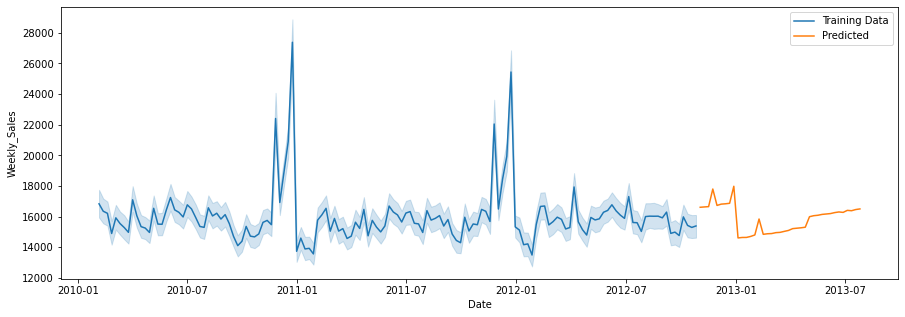

In [76]:
#Plot figure with training set and predicted values from validation set predictions
plt.figure(figsize=(15,5))
sns.lineplot(train_feat["Date"],train_feat["Weekly_Sales"])
sns.lineplot(pred_time_series["Date"],pred_time_series["Y_pred"])
plt.legend(["Training Data","Predicted"])

## Neural Network

We will implement a neural netowokr with a single hidden layer to learn the model parameters. The input to the network will be the features of each observation (9 values) and the outputn should be the regression estimate (1 value)

In [55]:
# Define nn class with fixed structure to test implementation, then scale number of nuerons and layers for better model performance
class SalesNet(torch.nn.Module):
    def __init__(self):
        super(SalesNet, self).__init__()
        self.model = torch.nn.Sequential(
        torch.nn.Linear(9, 50),
        torch.nn.ReLU(),
        torch.nn.Linear(50,1)
      )

    def forward(self, x):
        x = self.model(x)
        return x

In [56]:
# Create instance of class SalesNet
net = SalesNet()
print(net)

SalesNet(
  (model): Sequential(
    (0): Linear(in_features=9, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=1, bias=True)
  )
)


In [57]:
# Define optimizers and loss function
optimizer = torch.optim.Adam(net.parameters())
loss_function = torch.nn.MSELoss()

In [60]:
# Create dataframe with continuous variables normalized
norm_train_feat = train_feat[["Store","Dept","IsHoliday","CPI","Unemployment","Type","Size","Week","Year"]]
norm_weekly_sales = train_feat[["Weekly_Sales"]]

# Min Max transform Store, Dept, Week
# Keep scaling factors to visualize trained network
store_min = norm_train_feat["Store"].min()
store_max = norm_train_feat["Store"].max()
dept_min = norm_train_feat["Dept"].min()
dept_max = norm_train_feat["Dept"].max()
week_min = norm_train_feat["Week"].min()
week_max = norm_train_feat["Week"].max()

norm_train_feat["Store"] = (norm_train_feat["Store"]-store_min)/(store_max-store_min)
norm_train_feat["Dept"] = (norm_train_feat["Dept"]-dept_min)/(dept_max-dept_min)
norm_train_feat["Week"] = (norm_train_feat["Week"]-week_min)/(week_max-week_min)

# Normalize CPI, Unemployment, Size, Year
# Keep scaling factors to visualize trained network
cpi_mean = norm_train_feat["CPI"].mean()
cpi_std = norm_train_feat["CPI"].std()
unemp_mean = norm_train_feat["Unemployment"].mean()
unemp_std = norm_train_feat["Unemployment"].std()
size_mean = norm_train_feat["Size"].mean()
size_std = norm_train_feat["Size"].std()
year_mean = norm_train_feat["Year"].mean()
year_std = norm_train_feat["Year"].std()
week_sales_mean = norm_weekly_sales["Weekly_Sales"].mean()
week_sales_std = norm_weekly_sales["Weekly_Sales"].std()

norm_train_feat["CPI"]=(norm_train_feat["CPI"]-cpi_mean)/cpi_std
norm_train_feat["Size"]=(norm_train_feat["Size"]-size_mean)/size_std
norm_train_feat["Unemployment"]=(norm_train_feat["Unemployment"]-unemp_mean)/unemp_std
norm_train_feat["Year"]=(norm_train_feat["Year"]-year_mean)/year_std

norm_weekly_sales["Weekly_Sales"] = (norm_weekly_sales["Weekly_Sales"]-week_sales_mean)/week_sales_std

In [65]:
# Separate features and training 
x = norm_train_feat.to_numpy().astype('float64')
y = norm_weekly_sales.to_numpy().astype('float64')

# Create tensors to work with PyTorch
x_tensor = torch.from_numpy(x)
y_tensor = torch.from_numpy(y)

x_tensor = Variable(x_tensor)
y_tensor = Variable(y_tensor)

In [72]:
# Separate tensors into training and testing sets to validate hyper-parameters
X_train, X_test, y_train, y_test = train_test_split(x_tensor,y_tensor,test_size = 0.2, shuffle=False)
# Create Dataset wrapper
train_ds = TensorDataset(X_train,y_train)
test_ds = TensorDataset(X_test,y_test)
# Create DtaLoader batch iterator
BATCH_SIZE = 64
train_loader = DataLoader(train_ds,batch_size=BATCH_SIZE,shuffle=False)
test_loader = DataLoader(test_ds,batch_size=BATCH_SIZE,shuffle=False)

In [76]:
#Run epochs of training
iters = []
losses = []
epochs = 10
for epoch in range(epochs):
    #Simple pass using DataLoader
    for n, (xb, yb) in enumerate(train_loader):
        optimizer.zero_grad()   # clear gradients for next train
        prediction = net(xb.float())
        loss = loss_function(prediction, yb.float())     # must be (1. nn output, 2. target)
        loss.backward()         # backpropagation, compute gradients
        optimizer.step() 
        iters.append(n)
        losses.append(float(loss)/BATCH_SIZE)

Text(0, 0.5, 'Batch average loss')

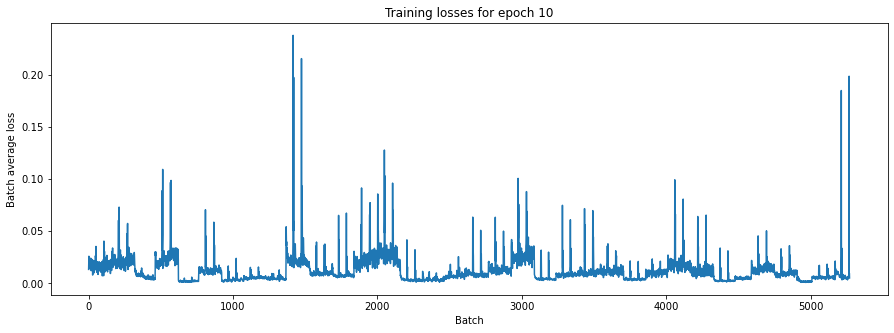

In [88]:
#Plot losses for last epoch
n_terms = len(train_loader)
plt.figure(figsize=(15,5))
sns.lineplot(iters[-n_terms:],losses[-n_terms:])
plt.title("Training losses for epoch {}".format(epochs))
plt.xlabel("Batch")
plt.ylabel("Batch average loss")

In [110]:
weights = norm_train_feat.iloc[-len(y_test):,:].IsHoliday.apply(lambda x: 5 if x else 1).to_numpy()
y_pred = net(X_test.float())
y_pred_array = y_pred.detach().numpy()
y_test_array = y_test.detach().numpy()
print(len(weights),len(y_pred_array),len(y_test_array))
wmae_test = np.sum(np.multiply(weights,abs(y_pred_array-y_test_array)))/np.sum(weights)

84314 84314 84314


MemoryError: Unable to allocate 53.0 GiB for an array with shape (84314, 84314) and data type float64

In [115]:
# Plot trained data and trained model 
y_model = net(X_train.float())
y_nn_model = pd.DataFrame(y_model.detach().numpy())
y_nn_model.columns=["Y_pred"]
y_nn_model["Y_pred"] = y_nn_model["Y_pred"]*week_sales_std+week_sales_mean

In [117]:
y_nn_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337256 entries, 0 to 337255
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Y_pred  337256 non-null  float64
dtypes: float64(1)
memory usage: 2.6 MB


In [118]:
train_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   CPI           421570 non-null  float64       
 7   Unemployment  421570 non-null  float64       
 8   Type          421570 non-null  int64         
 9   Size          421570 non-null  int64         
 10  Week          421570 non-null  UInt32        
 11  Year          421570 non-null  UInt32        
dtypes: UInt32(2), bool(1), datetime64[ns](1), float64(4), int64(4)
memory usage: 52.7 MB


<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

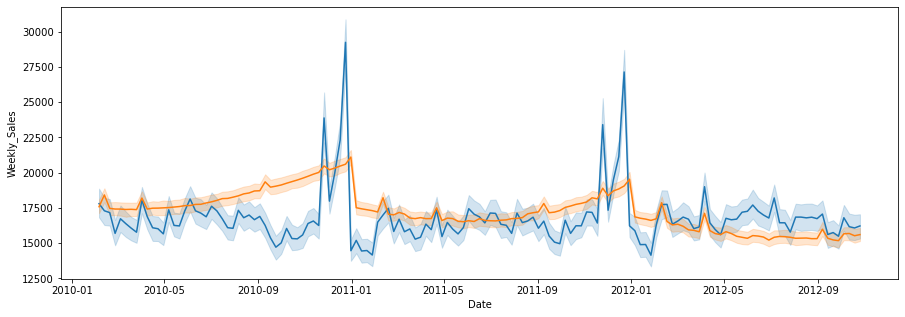

In [120]:
plt.figure(figsize=(15,5))
sns.lineplot(train_feat.iloc[:337256,:]["Date"],train_feat.iloc[:337256,:]["Weekly_Sales"])
sns.lineplot(train_feat.iloc[:337256,:]["Date"],y_nn_model["Y_pred"])

In [121]:
# Define nn class with two hidden layers to train model
class SalesNet2(torch.nn.Module):
    def __init__(self, num_hidden1, num_hidden2):
        super(SalesNet2, self).__init__()
        self.model = torch.nn.Sequential(
        torch.nn.Linear(9, num_hidden1),
        torch.nn.ReLU(),
        torch.nn.Linear(num_hidden1,num_hidden2),
        torch.nn.ReLU(),
        torch.nn.Linear(num_hidden2,1)
      )

    def forward(self, x):
        x = self.model(x)
        return x

In [129]:
# Define an instance for testing
net2 = SalesNet2(100,80)

In [130]:
#Run epochs of training
iters = []
losses = []
epochs = 5
for epoch in range(epochs):
    #Simple pass using DataLoader
    for n, (xb, yb) in enumerate(train_loader):
        optimizer.zero_grad()   # clear gradients for next train
        prediction = net2(xb.float())
        loss = loss_function(prediction, yb.float())     # must be (1. nn output, 2. target)
        loss.backward()         # backpropagation, compute gradients
        optimizer.step() 
        iters.append(n)
        losses.append(float(loss)/BATCH_SIZE)

Text(0, 0.5, 'Batch average loss')

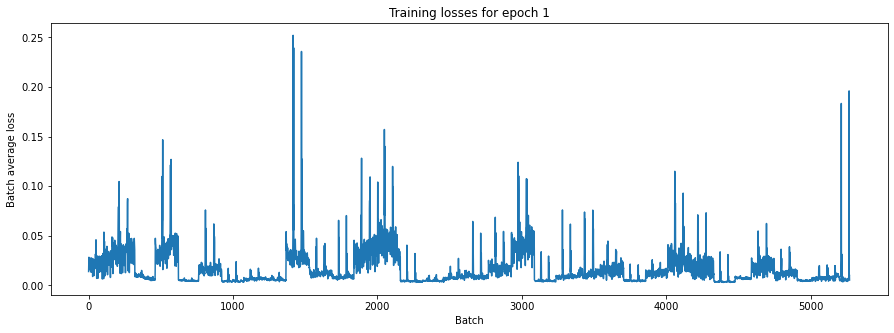

In [131]:
#Plot losses for last epoch
n_terms = len(train_loader)
plt.figure(figsize=(15,5))
sns.lineplot(iters[-n_terms:],losses[-n_terms:])
plt.title("Training losses for epoch {}".format(epochs))
plt.xlabel("Batch")
plt.ylabel("Batch average loss")

In [132]:
# Plot trained data and trained model 
y_model2 = net2(X_train.float())
y_nn_model2 = pd.DataFrame(y_model.detach().numpy())
y_nn_model2.columns=["Y_pred"]
y_nn_model2["Y_pred"] = y_nn_model["Y_pred"]*week_sales_std+week_sales_mean

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

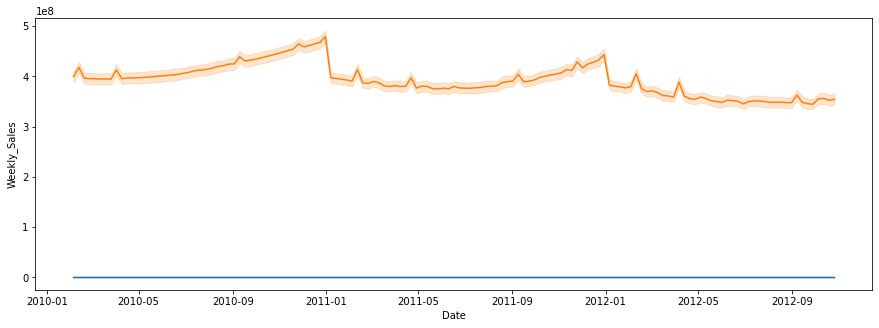

In [133]:
plt.figure(figsize=(15,5))
sns.lineplot(train_feat.iloc[:337256,:]["Date"],train_feat.iloc[:337256,:]["Weekly_Sales"])
sns.lineplot(train_feat.iloc[:337256,:]["Date"],y_nn_model2["Y_pred"])

# Conclusions